In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
adv = pd.read_csv("../input/advertising-dataset/advertising.csv")

In [4]:
adv.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [5]:
adv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
adv.shape

(200, 4)

In [7]:
adv.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [ ]:
#Data Cleaning

<AxesSubplot:>

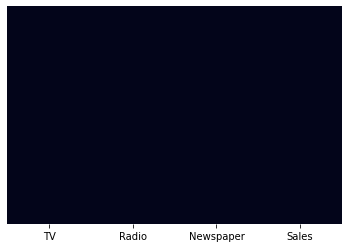

In [8]:
sns.heatmap(adv.isnull(),cbar=False,yticklabels=False)

In [ ]:
#Outlier analysis

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='TV'>

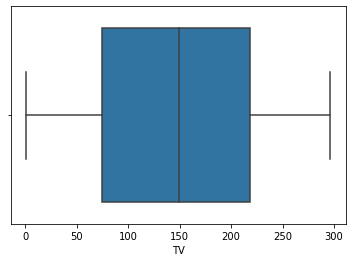

In [9]:
sns.boxplot(adv["TV"])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Radio'>

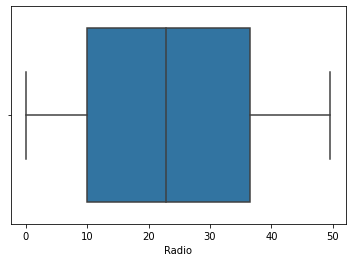

In [10]:
sns.boxplot(adv["Radio"])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Newspaper'>

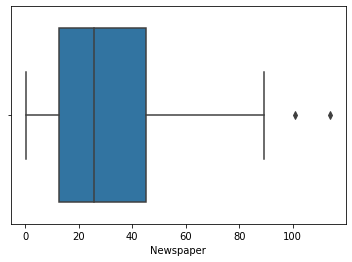

In [11]:
sns.boxplot(adv["Newspaper"])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Sales'>

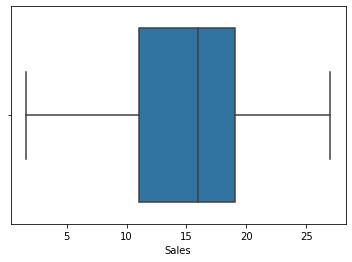

In [12]:
sns.boxplot(adv["Sales"])

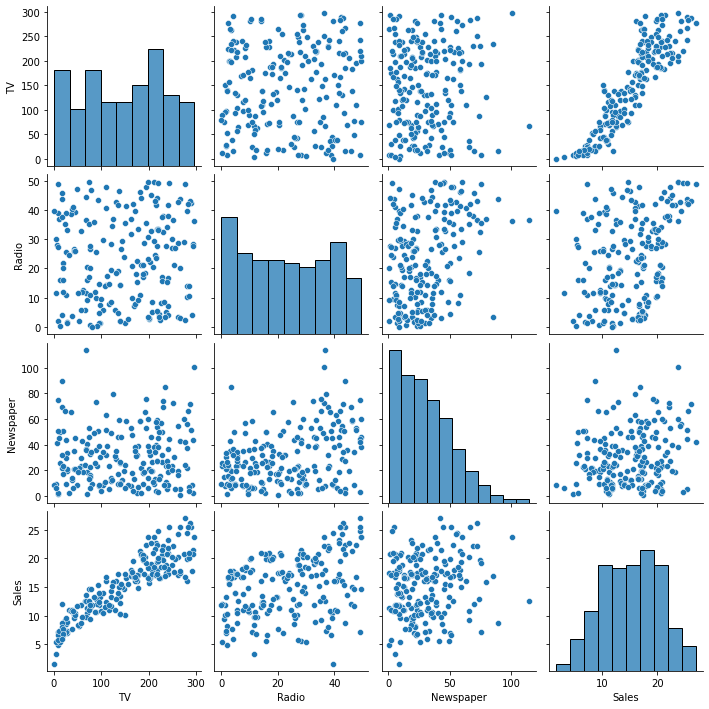

In [13]:
sns.pairplot(adv)

<AxesSubplot:>

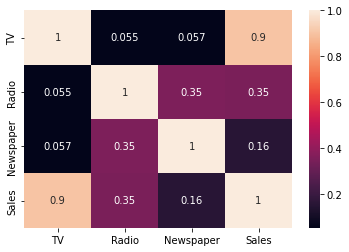

In [14]:
sns.heatmap(adv.corr(),annot=True)

In [ ]:
#SIMPLE LINEAR REGRESSION

In [15]:
X_1=adv[["TV"]]
Y_1=adv["Sales"]

In [16]:
from sklearn.model_selection import train_test_split
X_train_1,X_test_1,Y_train_1,Y_test_1 = train_test_split(X_1,Y_1,test_size=0.4,random_state=1)

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
slm = LinearRegression(fit_intercept = True)

In [19]:
slm.fit(X_train_1,Y_train_1)

LinearRegression()

In [20]:
slm.coef_

array([0.05478112])

In [21]:
slm.intercept_

6.9850652226218575

In [22]:
y_1_pred = slm.predict(X_test_1)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Sales'>

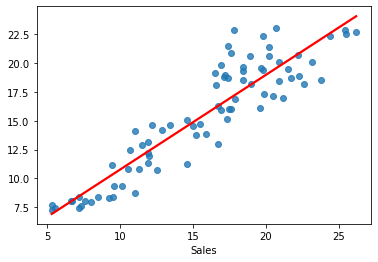

In [23]:
sns.regplot(Y_test_1, y_1_pred, line_kws={'color':'red'}, ci=None)

In [24]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [25]:
R2 = r2_score(Y_test_1,y_1_pred )
Mse = mean_squared_error(Y_test_1, y_1_pred)
Rmse = np.sqrt(Mse)
Mae = mean_absolute_error(Y_test_1, y_1_pred)

In [26]:
R2

0.8406876486370001

In [27]:
Mse

4.642560810231474

In [28]:
Rmse

2.154660254014882

In [29]:
Mae

1.7637470190860398

In [30]:
res=(y_1_pred-Y_test_1)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sales', ylabel='Density'>

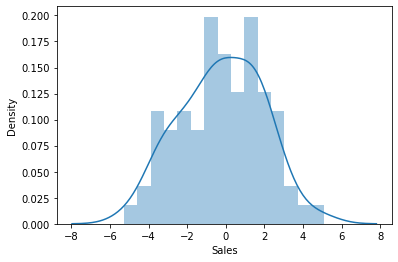

In [31]:
sns.distplot(res, bins = 15)

In [32]:
adv

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [33]:
#value check

In [35]:
pred_y_table = pd.DataFrame({"Actual Value":Y_test_1,"Predicted Value":y_1_pred,"Difference":res})
pred_y_table

,Actual Value,Predicted Value,Difference
58,23.8,18.532925,-5.267075
40,16.6,18.078241,1.478241
34,11.9,12.227618,0.327618
102,19.8,22.334734,2.534734
184,17.6,20.888513,3.288513
...,...,...,...
113,20.9,18.467187,-2.432813
12,9.2,8.288856,-0.911144
117,9.4,11.170343,1.770343
93,22.2,20.729648,-1.470352


In [36]:
pred_y_table.describe()

,Actual Value,Predicted Value,Difference
count,80.000000,80.000000,80.000000
mean,15.611250,15.385544,-0.225706
std,5.432322,4.860813,2.156325
min,5.300000,7.280883,-5.267075
25%,11.225000,11.244297,-1.850463
50%,16.800000,16.026689,-0.141299
75%,19.800000,19.373815,1.352068
max,26.200000,23.068801,5.109936


In [37]:
#MULTIPLE LINEAR REGRESSION

In [38]:
X=adv[["TV","Radio","Newspaper"]]
Y=adv["Sales"]

In [39]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.4,random_state=1)

In [40]:
mlm = LinearRegression(fit_intercept = True)

In [41]:
mlm.fit(X_train,Y_train)

LinearRegression()

In [42]:
mlm.coef_

array([ 0.05415489,  0.11088638, -0.00153792])

In [43]:
mlm.intercept_

4.644956708301063

In [44]:
y_pred = mlm.predict(X_test)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Sales'>

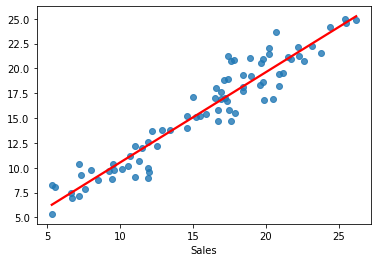

In [45]:
sns.regplot(Y_test, y_pred, line_kws={'color':'red'}, ci=None)

In [46]:
Y_test.shape

(80,)

In [48]:
k=3
n=80

In [49]:
r2 = r2_score(Y_test,y_pred )
mse = mean_squared_error(Y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(Y_test, y_pred)
adj_r2= 1- ((1-r2)*(n-1)/(n-k-1))

In [50]:
r2

0.9115353314340993

In [51]:
mse

2.5779708846200116

In [52]:
rmse

1.6056060801516703

In [53]:
mae

1.2632485791562218

In [54]:
adj_r2

0.9080433050433401

In [55]:
res_1=(Y_test-y_pred)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sales', ylabel='Density'>

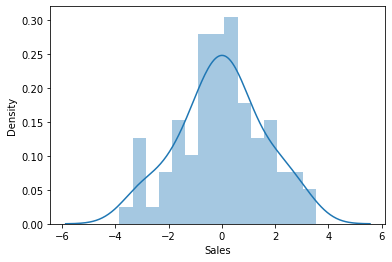

In [56]:
sns.distplot(res_1, bins = 15)

In [57]:
adv

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [58]:
#value check

In [59]:
pred_y_table_1 = pd.DataFrame({"Actual Value":Y_test,"Predicted Value":y_pred,"Difference":res_1})
pred_y_table_1

,Actual Value,Predicted Value,Difference
58,23.8,21.502791,2.297209
40,16.6,18.035489,-1.435489
34,11.9,9.971440,1.928560
102,19.8,20.906196,-1.106196
184,17.6,20.705209,-3.105209
...,...,...,...
113,20.9,18.263624,2.636376
12,9.2,9.724606,-0.524606
117,9.4,8.848338,0.551662
93,22.2,22.168578,0.031422


In [60]:
pred_y_table_1.describe()

,Actual Value,Predicted Value,Difference
count,80.000000,80.000000,80.000000
mean,15.611250,15.636744,-0.025494
std,5.432322,5.163370,1.615533
min,5.300000,5.359369,-3.845760
25%,11.225000,10.402725,-0.876248
50%,16.800000,16.251377,0.029259
75%,19.800000,19.809990,0.953464
max,26.200000,24.945379,3.547025


so multiple linear regression is giving us the better result